In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

Read in file, 
with options to parse date field and set date as index

### COVID data file - covering Feb 2020 to April 2021

In [ ]:
infile='C:/Users/kate.beard/Downloads/cases_by_county_history.csv'
cv = pd.read_csv(infile, parse_dates=['Date'])

In [ ]:
cv.head()

In [ ]:
cv.head()

In [ ]:
cv.dtypes

In [ ]:
cv['Year']=pd.to_datetime(cv['Date']).dt.strftime('%Y')
cv['Month']=pd.to_datetime(cv['Date']).dt.strftime('%m')
cv['Day']=pd.to_datetime(cv['Date']).dt.strftime('%d')

In [ ]:
cv['Year']=cv['Date'].dt.year
cv['Month']=cv['Date'].dt.month
cv['Week'] = cv['Date'].dt.isocalendar().week
cv['Day']=cv['Date'].dt.day

In [ ]:
mind=cv['Date'].min()
maxd=cv['Date'].max()

In [ ]:
cv['idx']=pd.PeriodIndex(year=cv['Year'],month=cv['Month'], freq='M')

Read in the file, parse the date field and make Date the index.

In [ ]:
cv = pd.read_csv(infile, parse_dates=['Date'], index_col=['Date'])

Now we can change the period of the index, using to_period and specifying a desired frequency

In [ ]:
 cv2=cv.to_period(freq='M')

In [ ]:
cv2.head()

In [ ]:
cv2.index

In [ ]:
cvp=cv2.pivot_table('Total_Cases', index='Date', columns='Patient_County')

In [ ]:
cvp

In [ ]:
plt.rcParams['figure.figsize'] = (8.0, 8.0)

In [ ]:
ax = sns.heatmap(cvp, cmap='Reds',
                linewidths=.3, linecolor='lightblue')
ax.set_xlabel('County', color='k', fontsize=14)
ax.set_ylabel('Year-Month',color='k', fontsize=14)
ax.set_title("Covid Cases: Feb 2020-Apr 2021", fontsize=16);

In [ ]:
CT=cvp.T

In [ ]:
plt.rcParams['figure.figsize'] = (8.0, 8.0)

In [ ]:
ax = sns.heatmap(CT, cmap='Reds',
                linewidths=.3, linecolor='lightblue')
ax.set_xlabel('Year-Month', color='k', fontsize=14)
ax.set_ylabel('County',color='k', fontsize=14)
ax.set_title("Covid Cases", fontsize=16);

In [ ]:
cvpsum=cv2.pivot_table('Total_Cases', index='Date', columns='Patient_County',aggfunc=np.sum)

In [ ]:
CTSum=cvpsum.T

In [ ]:
ax = sns.heatmap(CTSum, cmap='Reds',
                linewidths=.3, linecolor='lightblue')
ax.set_xlabel('County', color='k', fontsize=14)
ax.set_ylabel('Year-Month',color='k', fontsize=14)
ax.set_title("Covid Cases: Feb 2020-Apr 2021", fontsize=16);

We can also look at the data at a finer temporal resolution - by week for example.

In [ ]:
cv3=cv.to_period(freq='W')

In [ ]:
cv3.head()

In [ ]:
cvw=cv3.pivot_table('Total_Cases', index='Date', columns='Patient_County')

In [ ]:
cvw.head()

In [ ]:
cbackt=cvw.to_timestamp()

In [ ]:
cbackt.head()

In [ ]:
cvw2=cvw.T

In [ ]:
plt.rcParams['figure.figsize'] = (10.0, 12.0)

In [ ]:
ax = sns.heatmap(cvw, cmap='Reds',
                linewidths=.3, linecolor='lightblue')
ax.set_xlabel('County', color='k', fontsize=14)
ax.set_ylabel('Week',color='k', fontsize=14)
ax.set_title("Covid Cases", fontsize=16);

In [ ]:
cvw.shape

### Another example - Seattle Bicycle Counts¶
This data comes from an automated bicycle counter, installed in late 2012, which has inductive sensors on the east and west sidewalks of the bridge. 

link: https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k

The data consists of a date/time field: Date, east pathway count field: Fremont Bridge NB, and west pathway count field: Fremont Bridge SB. The count fields represent the total bicycles detected during the specified one hour period

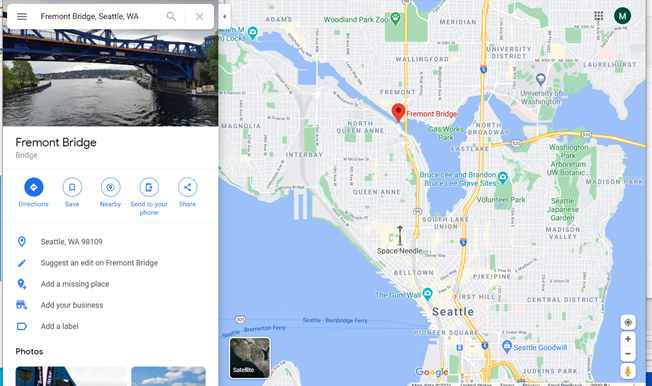

In [ ]:
infile='C:/Courses/DSE Practicum/Data/Fremont_Bridge_Bicycle_Counter.csv'

In [ ]:
bc = pd.read_csv(infile, index_col='Date', parse_dates=True)


In [ ]:
bc.tail()

In [ ]:
bc.shape

In [ ]:
bc.columns

In [ ]:
bc=bc.rename(columns={'Fremont Bridge Total': 'Total', 'Fremont Bridge East Sidewalk':'East',
                     'Fremont Bridge West Sidewalk':'West'})  

In [ ]:
 %matplotlib inline

In [ ]:
sns.set_style("whitegrid")

In [ ]:
plt.rcParams['figure.figsize'] = (10.0, 10.0)

In [ ]:
a=bc.plot()
a.set_ylabel('Hourly Bicycle Count');

In [ ]:
a=bc[['Total','East']].plot()
a.set_ylabel('Hourly Bicycle Count');

We can resample to a lower frequency

In [ ]:
weekly = bc.resample('W').sum()
weekly.plot(style=[':', '--', '-']);

Data can be aggregated using a rolling mean with the pd.rolling() function. 

The rolling operator behaves similarly to resample and groupby.  It specifies a window -number of periods.
The size of the moving window is the number of observations used for calculating the statistic. 

Each window is a fixed size.

In [ ]:
daily = bc.resample('D').sum()

In [ ]:

daily.rolling(30, center=True).sum().plot(style=[':', '--', '-']);



In [ ]:
daily.rolling(60, center=True).sum().plot(style=[':', '--', '-']);

We can get a smoother version of a rolling mean using a window function–for example, a Gaussian window. 

The following code specifies both the width of the window (we chose 50 days) and the width of the Gaussian within the window (we chose 10 days):

In [ ]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

In [ ]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=5).plot(style=[':', '--', '-']);

In [ ]:
daily.rolling(50, center=True,
              win_type='triang').sum().plot(style=[':', '--', '-']);

Smoothed data views are useful to get an idea of the general trend in the data
but may hide other interesting structure. 

For example, we might want to look at the average traffic as a function of the time of day. 
We can do this using the GroupBy 

In [ ]:
by_time = bc.groupby(bc.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);


The hourly traffic is strongly bimodal, with peaks around 8:00 in the morning and 5:00 in the evening. This is likely evidence of commuter traffic crossing the bridge. This is further evidenced by the differences between the western sidewalk and the eastern sidewalk which peaks more strongly in the evening.

We can also look at change based on the day of the week. Again with groupby.

In [ ]:
by_weekday = bc.groupby(bc.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

We can do a compound GroupBy to look at the hourly trend on weekdays versus weekends. 

Create a grouping by both a flag marking the weekend, and the time of day:

In [ ]:
weekend = np.where(bc.index.weekday < 5, 'Weekday', 'Weekend')
by_time = bc.groupby([weekend, bc.index.time]).mean()

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);

In [ ]:
bc2020=bc.loc["2020"]

In [ ]:
bc2020.head()

In [ ]:
a=bc2020.plot()
a.set_ylabel('Hourly Bicycle Count');

In [ ]:
daily = bc2020.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-']);


In [ ]:
by_time = bc2020.groupby(bc2020.index.time).mean()

In [ ]:
by_time = bc2020.groupby(bc2020.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);


In [ ]:
by_weekdayall = bc.groupby(data.index.dayofweek).mean()
by_weekday = bc2020.groupby(bc2020.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekdayall.plot(style=[':', '--', '-'])
by_weekday.plot(style=[':', '--', '-']);

In [ ]:
weekend = np.where(bc2020.index.weekday < 5, 'Weekday', 'Weekend')
by_time = bc2020.groupby([weekend, bc2020.index.time]).mean()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);

In [ ]:
bc13_16=bc.loc["2013":"2016"]


In [ ]:
a=bc13_16.plot()
a.set_ylabel('Hourly Bicycle Count');

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time = bc13_16.groupby(bc13_16.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(ax=ax[0],xticks=hourly_ticks, style=[':', '--', '-']);

by_time = bc2020.groupby(bc2020.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(ax=ax[1],xticks=hourly_ticks, style=[':', '--', '-']);


In [ ]:
 #dft["2013-1":"2013-2-28"]
bc20=bc.loc["2020-1":"2020-3"]

In [ ]:
bc21=bc.loc["2021-1":"2021-3"]

In [ ]:
cmax=bc20['Total'].max

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time = bc20.groupby(bc20.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)

by_time.plot(ax=ax[0],xticks=hourly_ticks, style=[':', '--', '-']);

by_time = bc21.groupby(bc21.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)

by_time.plot(ax=ax[1],xticks=hourly_ticks, style=[':', '--', '-']);
